In The Name Of God

# 🖼️→✍️ Image-to-Story Generator with BLIP-2 + Flan-T5
Generate imaginative stories from any image using BLIP-2 and Flan-T5.
This notebook uses Hugging Face Transformers and PyTorch for inference.

In [7]:
! pip install -q transformers accelerate torch torchvision

In [2]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [3]:
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl",
    device_map="auto",
    torch_dtype=torch.float16
)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

### 📷 Upload an Image or Use a URL

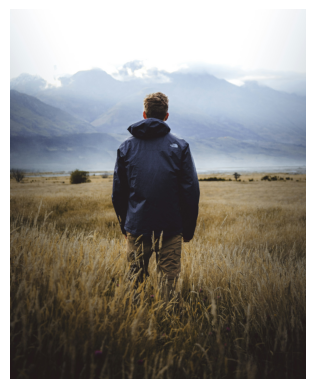

In [4]:
# Option 1: Load image from URL
image_url = "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"  # Change to your image URL
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")

# Option 2: Upload image manually
# from google.colab import files
# uploaded = files.upload()
# image = Image.open(list(uploaded.values())[0]).convert("RGB")

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

### ✍️ Generate a Story

In [6]:
prompt = "Write a short imaginative story about this image."

inputs = processor(images=image, text=prompt, return_tensors="pt").to("cpu", torch.float16)

output = model.generate(**inputs, max_new_tokens=150)
story = processor.decode(output[0], skip_special_tokens=True)

print("📝 Generated Story:")
print(story)

📝 Generated Story:
a man is standing in a field of wheat
